# Tarea 1: Regresión Lineal
## Arantza Gomez Haro Gamboa

Crea una regresión lineal con los demás inputs numericos

'housing_median_age', 'total_rooms',
'total_bedrooms', 'population', 'households'

- Realiza un analisis bivariado de cada uno de estos
- Escribe la ecuación del modelo 
- Obtener R2 y mean squared error
- Grafica las predicciones 

Responde la pregunta: ¿Cuál es el mejor modelo de estos? ¿Por qué?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Datos y Visualización:

In [2]:
df = pd.read_csv('housing.csv')
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


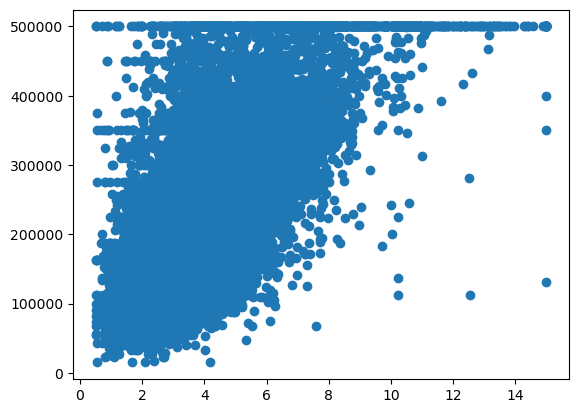

In [3]:
plt.scatter(df.median_income, df.median_house_value)

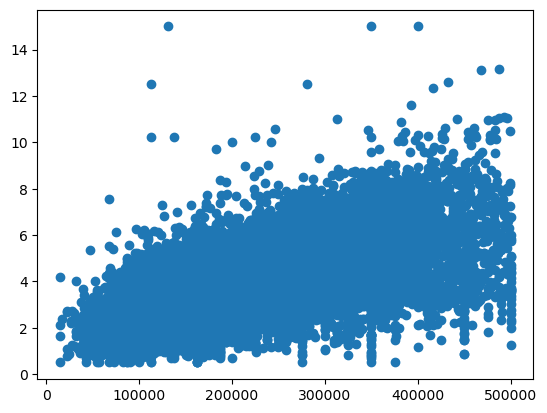

In [4]:
df = df[df.median_house_value != df.median_house_value.max()]
plt.scatter(df.median_house_value , df.median_income)

## Housing Median Age:

### Análisis Bivariado:

C:\Users\arant\AppData\Local\Temp\ipykernel_16056\1685730080.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_age = df.groupby('housing_median_age_bin').mean()


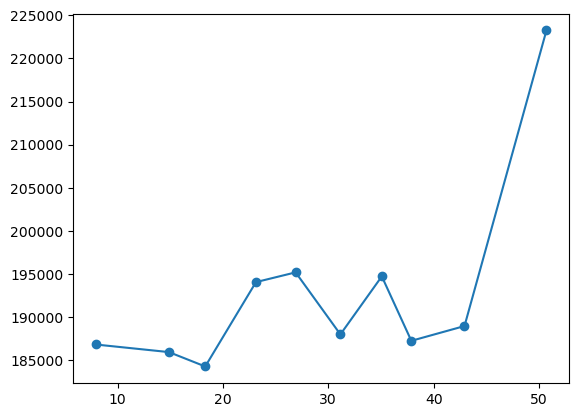

In [5]:
df['housing_median_age_bin'] = pd.qcut(df['housing_median_age'] , q = 10, labels = False) + 1
grouped_age = df.groupby('housing_median_age_bin').mean()
plt.plot(grouped_age.housing_median_age.values, grouped_age.median_house_value.values, marker = "o")

#### Análisis: 
- Con la gráfica anterior, podemos analizar que la relación entre las variables de **housing median age** y **median house value** no es lineal. Es decir, el tener una casa con una mayor edad no necesariamente significa que tendrá un mayor precio. Esto se demuestra con los picos y las caídas encontradas en la gráfica. Dicho esto, si llega un punto en la gráfica donde se puede apreciar un incremento muy notorio.

### R2 y Mean Squared Error:

In [6]:
# housing median age
X_age = df[['housing_median_age']]
y = df['median_house_value']

model_age = linear_model.LinearRegression().fit(X_age, y)

print(r2_score(y_true = y, y_pred = model_age.predict(X_age)))
print(mean_squared_error(y_true = y, y_pred = model_age.predict(X_age)))

0.004616870761555925
9502976334.705992


### Ecuación del Modelo:

In [7]:
# Interepto
model_age.intercept_

177411.7980609347

In [8]:
# Coeficientes
model_age.coef_

array([530.7537496])

$$ Precio = 177,411 + 530 * housing\quad median\quad age $$

### Gráfica de las Predicciones:

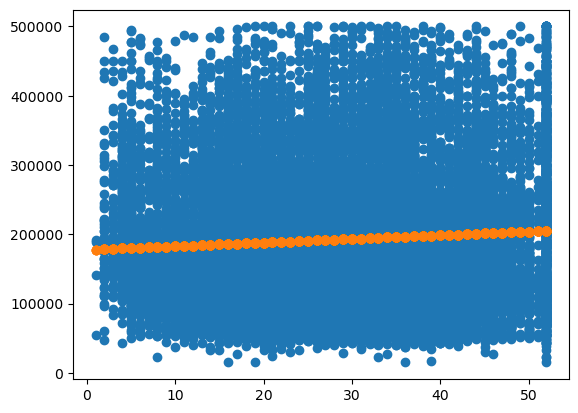

In [9]:
predicciones = model_age.predict(X_age)
df['predicciones'] = predicciones

plt.scatter(df.housing_median_age, df.median_house_value)
plt.scatter(df.housing_median_age, df.predicciones)

#### Análisis:
- Con la información calculada anteriormente, podemos analizar que este modelo cuenta con un R2 del 0.46%, lo cuál nos indica que este modelo explica aproximadamente el 0.46% de la variabilidad de los datos. También, es muy evidente que este modelo cuenta con una dispersión de datos muy elevada. Esto nos indica que la edad de las casas no es una variable con alta relación al precio.

## Total Rooms

### Análisis Bivariado:

C:\Users\arant\AppData\Local\Temp\ipykernel_16056\933338646.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_rooms = df.groupby('total_rooms_bin').mean()


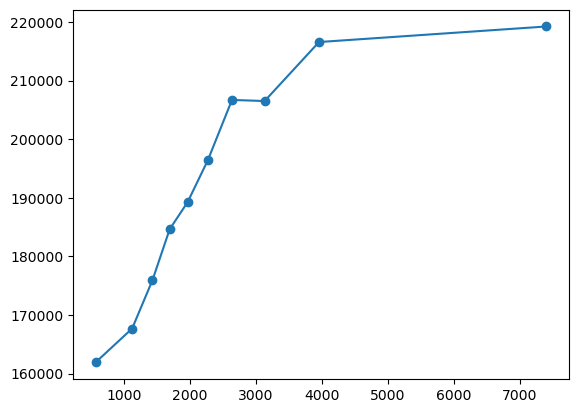

In [10]:
df['total_rooms_bin'] = pd.qcut(df['total_rooms'] , q = 10, labels = False) + 1
grouped_rooms = df.groupby('total_rooms_bin').mean()
plt.plot(grouped_rooms.total_rooms.values, grouped_rooms.median_house_value.values, marker = "o")

#### Análisis:
- Con la gráfica anterior, podemos analizar como si existe una relación un poco lineal entre las variables de **total rooms** y **median house value**. En otras palabras, conforme aumenta la cantidad de cuartos de la casa, también aumenta el precio de la casa. Dicho esto, podemos ver muy claramente como, en aproximadamente 3,000 cuartos deja de haber este incremento y luego inícia un incremento con una pendiente menos inclinada. 

### R2 y Mean Squared Error:

In [11]:
# total rooms
X_rooms = df[['total_rooms']]

model_rooms = linear_model.LinearRegression().fit(X_rooms, y)

print(r2_score(y_true = y, y_pred = model_rooms.predict(X_rooms)))
print(mean_squared_error(y_true = y, y_pred = model_rooms.predict(X_rooms)))

0.020488694351853853
9351447180.215874


### Ecuación del Modelo:

In [12]:
# Interepto
model_rooms.intercept_

175680.60158723383

In [13]:
# Coeficiente
model_age.coef_

array([530.7537496])

$$ Precio = 175,680 + 530 * total \quad rooms $$

### Gráfica de las Predicciones:

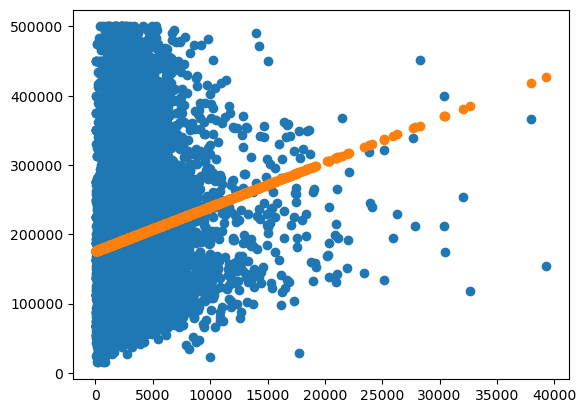

In [14]:
predicciones = model_rooms.predict(X_rooms)
df['predicciones'] = predicciones

plt.scatter(df.total_rooms, df.median_house_value)
plt.scatter(df.total_rooms, df.predicciones)

#### Análisis: 
- Con la información calculada anteriormente, podemos analizar que este modelo cuenta con un R2 del 2.04%, lo cuál nos indica que este modelo explica aproximadamente el 2.04% de la variabilidad de los datos. También, este modelo tiene un mean squared error alto, y una gráfica con una dispersión de datos fuerte.  Esto nos indica que la cantidad de cuartos no es una variable con alta relación al precio.

## Total Bedrooms

### Análisis Bivariado:

C:\Users\arant\AppData\Local\Temp\ipykernel_16056\459706430.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_bedrooms = df.groupby('total_bedrooms_bin').mean()


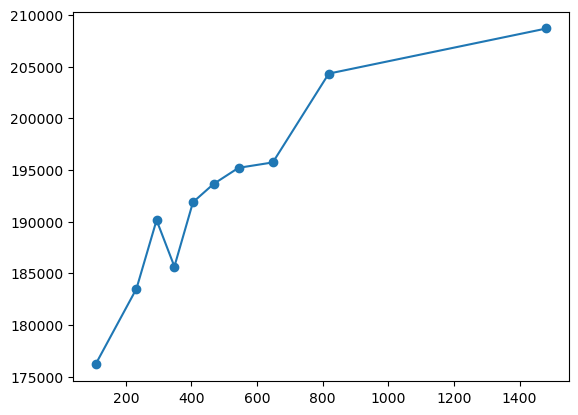

In [15]:
df['total_bedrooms_bin'] = pd.qcut(df['total_bedrooms'] , q = 10, labels = False) + 1
grouped_bedrooms = df.groupby('total_bedrooms_bin').mean()
plt.plot(grouped_bedrooms.total_bedrooms.values, grouped_bedrooms.median_house_value.values, marker = "o")

#### Análisis:
- Con la gráfica anterior, podemos ver que no existe una relación lineal entre las variables de **total bedrooms** y **median house value**. Claramente, existe una pendiente positiva en la línea, sin embargo, también existe una caída muy clara. Además, la pendiente en toda la línea no es igual. Entonces, no se podría afirmar que conforme aumenta la cantidad de recámaras, aumentará el precio de la casa.

### R2 y Mean Squared Error:

In [16]:
# total bedrooms
X_bedrooms = df[['total_bedrooms']]

model_bedrooms = linear_model.LinearRegression().fit(X_bedrooms, y)

print(r2_score(y_true = y, y_pred = model_bedrooms.predict(X_bedrooms)))
print(mean_squared_error(y_true = y, y_pred = model_bedrooms.predict(X_bedrooms)))

0.005365082732013637
9495833114.733957


### Ecuación del Modelo:

In [17]:
# Interepto
model_bedrooms.intercept_

183455.69921142788

In [18]:
# Coeficiente
model_bedrooms.coef_

array([16.89048081])

$$ Precio = 183,455 + 16 * total \quad bedrooms $$

### Gráfica de las predicciones:

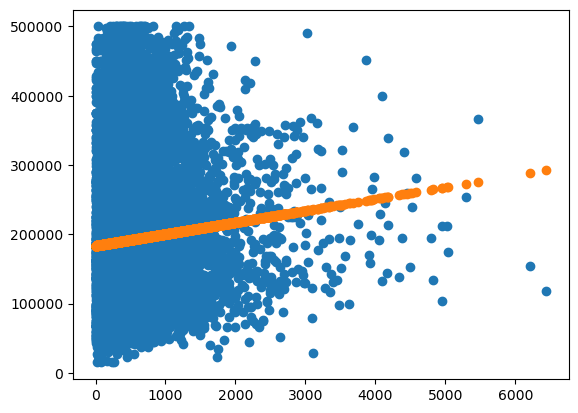

In [19]:
predicciones = model_bedrooms.predict(X_bedrooms)
df['predicciones'] = predicciones

plt.scatter(df.total_bedrooms, df.median_house_value)
plt.scatter(df.total_bedrooms, df.predicciones)

#### Análisis:
- Con la información calculada anteriormente, podemos analizar que este modelo cuenta con un R2 del 0.53%, lo cuál nos indica que este modelo explica aproximadamente el 0.53% de la variabilidad de los datos. Considerando esto, el modelo no es muy eficiente. Además, este modelo tiene un mean squared error alto.  Esto nos indica que la cantidad de recámaras no es una variable con alta relación al precio.

## Population

### Análisis Bivariado:

C:\Users\arant\AppData\Local\Temp\ipykernel_16056\468775625.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_population = df.groupby('population_bins').mean()


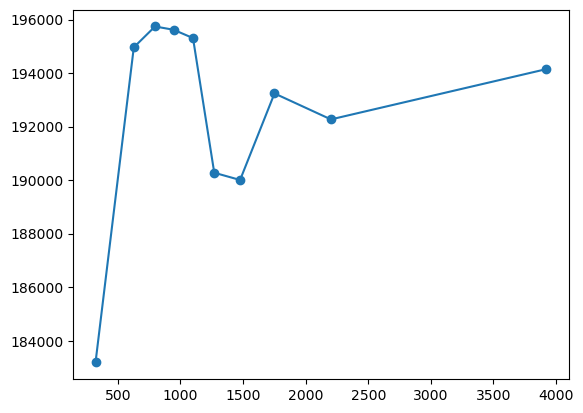

In [20]:
df['population_bins'] = pd.qcut(df['population'] , q = 10, labels = False) + 1
grouped_population = df.groupby('population_bins').mean()
plt.plot(grouped_population.population.values, grouped_population.median_house_value.values, marker = "o")

#### Análisis:
- Con la gráfica anterior, podemos analizar que definitivamente no existe una relación lineal entre las variables de **population** y **median house value**. Es decir, no aumenta el precio de la casa conforme aumenta la población. En esta gráfica en particular podemos ver que existe un aumento muy notorio al início, pero es seguido por una gran caída.

### R2 y Mean Squared Error:

In [21]:
# population
X_population = df[['population']]

model_population = linear_model.LinearRegression().fit(X_population, y)

print(r2_score(y_true = y, y_pred = model_population.predict(X_population)))
print(mean_squared_error(y_true = y, y_pred = model_population.predict(X_population)))

0.00014314747840926678
9545687211.793383


### Ecuación del Modelo:

In [22]:
# Interepto
model_population.intercept_

191005.0921058971

In [23]:
# Coeficiente
model_population.coef_

array([1.02222129])

$$ Precio = 191,005 + 1 * population $$

### Gráfica de las predicciones:

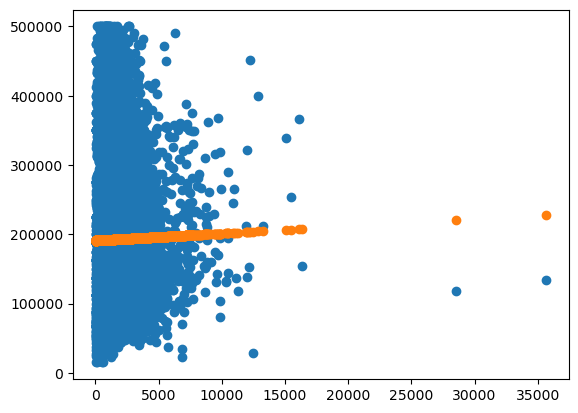

In [24]:
predicciones = model_population.predict(X_population)
df['predicciones'] = predicciones

plt.scatter(df.population, df.median_house_value)
plt.scatter(df.population, df.predicciones)

#### Análisis: 
- Con la información calculada anteriormente, podemos analizar que este modelo cuenta con un R2 del 0.01%, lo cuál nos indica que este modelo explica aproximadamente el 0.01% de la variabilidad de los datos. Este modelo es nada preciso y nada bueno para hacer predicciones. Además, este modelo cuenta con un mean squared error extremadamente alto, resultando en un modelo cero eficiente. 

## Households

### Análisis Bivariado:

C:\Users\arant\AppData\Local\Temp\ipykernel_16056\475327204.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_households = df.groupby('households_bins').mean()


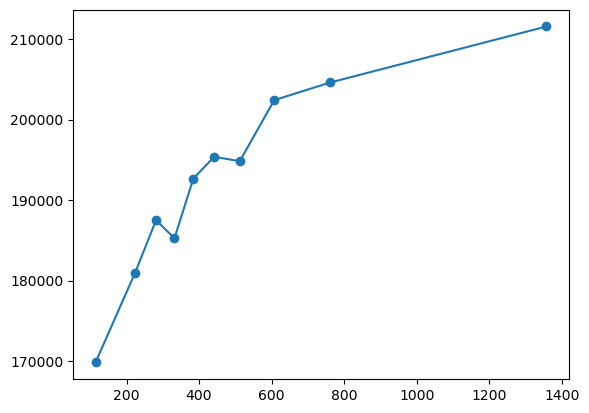

In [25]:
df['households_bins'] = pd.qcut(df['households'] , q = 10, labels = False) + 1
grouped_households = df.groupby('households_bins').mean()
plt.plot(grouped_households.households.values, grouped_households.median_house_value.values, marker = "o")

#### Análisis:
- Con la gráfica anterior, se puede ver una tendencia a la alza pero no necesariamente existe una relación lineal entre las variables de **households** y **median house value**. Esto es debido a que existen ciertas caídas en los precios de las casas. Por ejemplo, en aproximadamente 350 y 500 hogares existen caídas en los precios. 

### R2 y Mean Squared Error

In [26]:
# households
X_households = df[['households']]

model_households = linear_model.LinearRegression().fit(X_households, y)

print(r2_score(y_true = y, y_pred = model_households.predict(X_households)))
print(mean_squared_error(y_true = y, y_pred = model_households.predict(X_households)))

0.009004884338978392
9461083732.794487


### Ecuación del Modelo:

In [27]:
# Interepto
model_households.intercept_

180352.83033455774

In [28]:
# Coeficiente
model_households.coef_

array([24.19279495])

$$ Precio = 180,352 + 24 * households $$

### Gráfica de las predicciones:

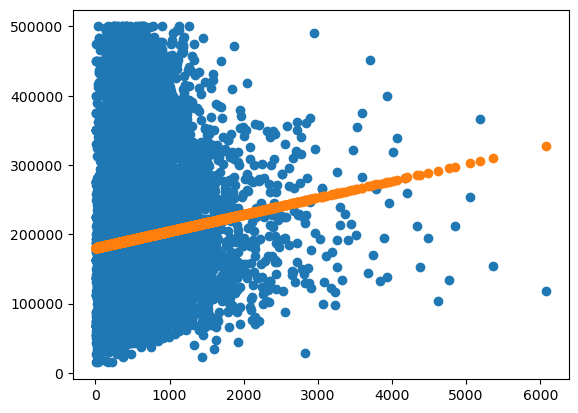

In [29]:
predicciones = model_households.predict(X_households)
df['predicciones'] = predicciones

plt.scatter(df.households, df.median_house_value)
plt.scatter(df.households, df.predicciones)

#### Análisis: 
- Con la información calculada anteriormente, podemos analizar que este modelo cuenta con un R2 del 0.9%, lo cuál nos indica que este modelo explica aproximadamente el 0.9% de la variabilidad de los datos. Este R2 es muy bajo, ya que es mejor cuando es más cercano a 1. Esto nos indica que el modelo no es preciso. Además, en la gráfica se puede ver mayor dispersión de datos.

## Median Income

### Análisis Bivariado:

C:\Users\arant\AppData\Local\Temp\ipykernel_16056\2142164323.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_income = df.groupby('median_income_bins').mean()


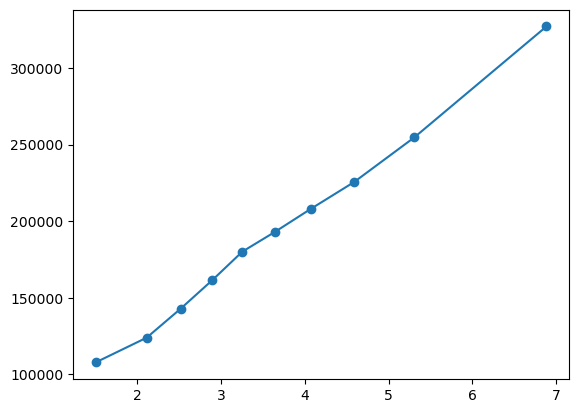

In [30]:
df['median_income_bins'] = pd.qcut(df['median_income'] , q = 10, labels = False) + 1
grouped_income = df.groupby('median_income_bins').mean()
plt.plot(grouped_income.median_income.values, grouped_income.median_house_value.values, marker = "o")

#### Análisis Bivariado: 
- Con la gráfica anterior, se puede ver muy claramente una tendencia a la alza y una relación lineal entre las variables de **median income** y **median house value**. Es decir, conforme aumenta el ingreso, se ve un claro incremento en el precio de las casas. Esto resulta en una relación lineal, lo cuál significa que existe una mayor precisión y el modelo se ajusta de mejor manera a los datos.

### R2 y Mean Squared Error:

In [31]:
# households
X_income = df[['median_income']]

model_income = linear_model.LinearRegression().fit(X_income, y)

print(r2_score(y_true = y, y_pred = model_income.predict(X_income)))
print(mean_squared_error(y_true = y, y_pred = model_income.predict(X_income)))

0.4129486198582022
5604611138.03709


### Ecuación del Modelo:

In [32]:
# Interepto
model_income.intercept_

45456.996782318514

In [33]:
# Coeficiente
model_income.coef_

array([39987.01206231])

$$ Precio = 45,456 + 39987 * median \quad income $$

### Gráfica de las Predicciones:

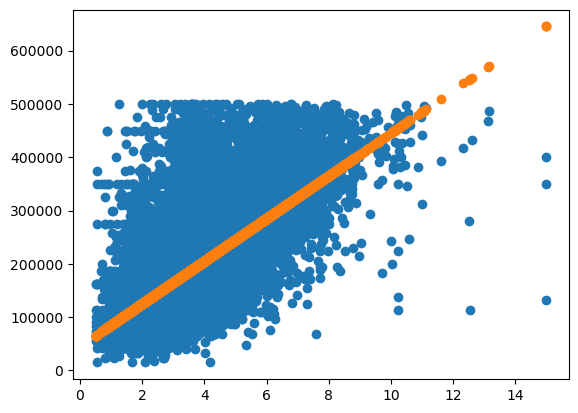

In [34]:
predicciones = model_income.predict(X_income)
df['predicciones'] = predicciones

plt.scatter(df.median_income, df.median_house_value)
plt.scatter(df.median_income, df.predicciones)

#### Análisis:
- Con la información calculada anteriormente, podemos analizar que este modelo cuenta con un R2 del 41.29%, lo cuál nos indica que este modelo explica aproximadamente el 41% de la variabilidad de los datos. Además, este modelo tiene un mean squared error más bajo que los demás, lo cuál significa que los valores que se predicen son más cercanos a los reales. También, se pueda apreciar una baja dispersión de puntos en la gráfica, indicando mayor precisión. 

## Conclusiones:

En conclusión, el modelo que claramente es el mejor es el de la variable de median income. Este modelo cuenta con un R2 de 41.29%, el cuál es el más alto de todos los modelos hechos. Además, el modelo de median income tiene un mean squared error de 5604611138, el cuál terminó siendo el más bajo. Por otro lado, al realizar las dos gráficas, podemos notar que este modelo es el que mejor se aproxima a los datos reales. La ecuación del modelo es la siguiente: 

$$ Precio = 45,456 + 39987 * median \quad income $$ 

Esta ecuación nos explica dos cosas principales:
1. Si una persona no contara con ningún ingreso, su casa tendría un precio de 45,456 dólares
2. El precio de las casas aumenta 39,987 dólares por cada mil dólares que aumenta el ingreso

Por último, es de suma importancia mencionar que este modelo aún podría mejorar, sin embargo, considerando que solamente se tomó en cuenta una sola variable, es bastante eficiente.